LOAD DATA

In [63]:
%load_ext autoreload
%autoreload 2
import dataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import numpy as np
import dataLoader
import os, csv

In [65]:
correcSCMatrix=True
normalizeBurden=True
maxNodeInput66 = 0.7

In [66]:
#base_folder = "/Users/joancarrerasdiaz/Desktop/CARPETES/UdG/TFG/Dades_Gus"

In [67]:
base_folder = dataLoader.base_folder

In [68]:
print(base_folder)

../../Data_Raw/from_Ritter


In [56]:
subject = "002_S_0413"

Load SC

In [45]:
dataLoader.loadSubjectData(subject, correcSCMatrix, normalizeBurden)

FileNotFoundError: ../../Data_Raw/from_Ritter/connectomes/002_S_0413/DWI_processing/connectome_weights.csv not found.

In [6]:
sc_folder = base_folder + '/connectomes/'+subject+"/DWI_processing"

In [7]:
SC = np.loadtxt(sc_folder + "/connectome_weights.csv")

In [8]:
if correcSCMatrix:
    N = SC.shape[0]
    logMatrix = np.log(SC+1)
    maxNodeInput = np.max(np.sum(logMatrix, axis=0)) 
    finalMatrix = logMatrix * maxNodeInput66 / maxNodeInput
    SCnorm=finalMatrix
else:
    SCnorm = np.log(SC + 1)

In [9]:
SC = SCnorm

Load PET Data (Amyloid)

In [10]:
normalize=True

In [11]:
modality="Amyloid"

In [12]:
pet_path = base_folder + "/PET_loads/"+subject+"/PET_PVC_MG/" + modality
RH_pet = np.loadtxt(pet_path+"/"+"L."+modality+"_load_MSMAll.pscalar.txt")
LH_pet = np.loadtxt(pet_path+"/"+"R."+modality+"_load_MSMAll.pscalar.txt")
subcort_pet = np.loadtxt(pet_path+"/"+modality+"_load.subcortical.txt")[-19:]
all_pet = np.concatenate((LH_pet,RH_pet,subcort_pet))

In [13]:
if normalize:
    normalizedPet = all_pet / np.max(all_pet) 
else:
    normalizedPet = all_pet

In [14]:
abeta_burden = normalizedPet

Load PET Data (Tau)

In [15]:
normalize=True

In [16]:
modality="Tau"

In [17]:
pet_path = base_folder + "/PET_loads/"+subject+"/PET_PVC_MG/" + modality
RH_pet = np.loadtxt(pet_path+"/"+"L."+modality+"_load_MSMAll.pscalar.txt")
LH_pet = np.loadtxt(pet_path+"/"+"R."+modality+"_load_MSMAll.pscalar.txt")
subcort_pet = np.loadtxt(pet_path+"/"+modality+"_load.subcortical.txt")[-19:]
all_pet = np.concatenate((LH_pet,RH_pet,subcort_pet))

In [18]:
if normalize:
    normalizedPet = all_pet / np.max(all_pet) 
else:
    normalizedPet = all_pet

In [19]:
tau_burden = normalizedPet

Load fMRI Data

In [20]:
fMRI_path = base_folder+"/fMRI/"+subject+"/MNINonLinear/Results/Restingstate"

In [21]:
series = np.loadtxt(fMRI_path+"/"+subject+"_Restingstate_Atlas_MSMAll_hp2000_clean.ptseries.txt")
subcSeries = np.loadtxt(fMRI_path+"/"+subject+"_Restingstate_Atlas_MSMAll_hp2000_clean_subcort.ptseries.txt")
fullSeries = np.concatenate((series,subcSeries))

In [22]:
fMRI_data = fullSeries

SHOW DATA

1. Visualize the Connectivity Matrix (SC)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

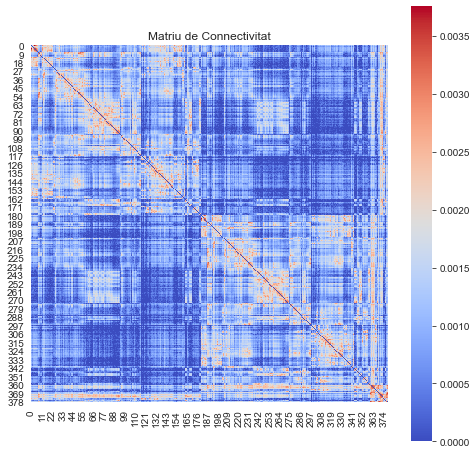

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(SC, cmap="coolwarm", square=True)
plt.title("Matriu de Connectivitat")
plt.show()

2. Visualize the Loading of "Amyloid-Beta" and "Tau"

In [25]:
abeta_burden.shape

(379,)

In [26]:
tau_burden.shape

(379,)

In [27]:
import matplotlib.pyplot as plt

In [32]:
modalities = ["Amyloid", "Tau"]
burdens = np.array([abeta_burden, tau_burden])

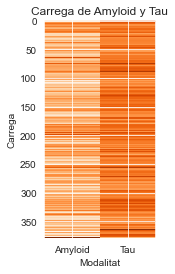

In [41]:
fig = plt.figure(figsize=(2, 4))
plt.imshow(burdens.T, cmap='Oranges', interpolation='nearest', aspect='auto')
plt.xticks([0,1], modalities)
plt.xlabel("Modalitat")
plt.ylabel("Carrega")
plt.title("Carrega de Amyloid y Tau")
plt.show()

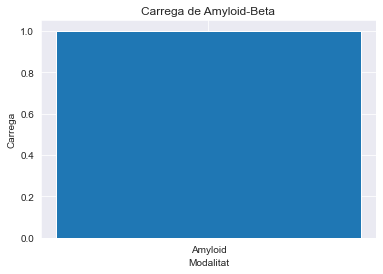

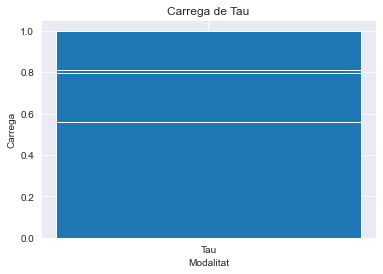

In [42]:
plt.figure(figsize=(6, 4))
plt.bar(modalities[0], burdens[0])
plt.xlabel("Modalitat")
plt.ylabel("Carrega")
plt.title("Carrega de Amyloid-Beta")
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(modalities[1], burdens[1])
plt.xlabel("Modalitat")
plt.ylabel("Carrega")
plt.title(f"Carrega de Tau")
plt.show()

3. Visualize the fMRI Time Series

In [43]:
import matplotlib.pyplot as plt

In [45]:
fMRI_data.shape

(379, 197)

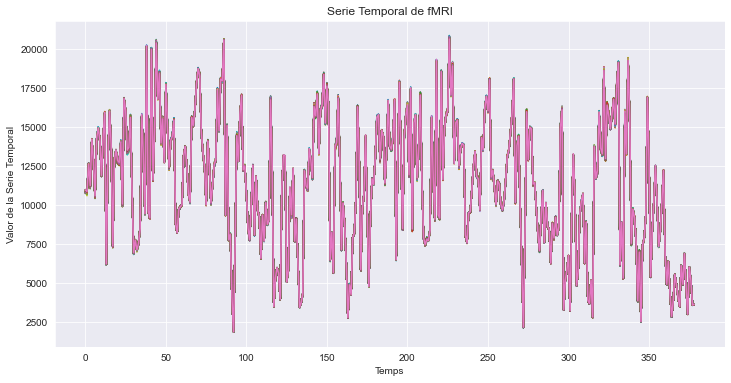

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(fMRI_data)
plt.xlabel("Temps")
plt.ylabel("Valor de la Serie Temporal")
plt.title("Serie Temporal de fMRI")
plt.show()